In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Exploaratory data analysis

In [6]:
car.head(1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol


In [7]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [8]:
car=car[car['year'].str.isnumeric()]

In [9]:
car['year']=car['year'].astype(int)

In [10]:
car['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [11]:

car=car[car['Price']!='Ask For Price']

In [12]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [13]:
car['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [14]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [15]:
car=car[car['kms_driven'].str.isnumeric()]

In [16]:
car['kms_driven']=car['kms_driven'].astype(int)

In [17]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [18]:
car=car[~car['fuel_type'].isna()]

In [19]:
car.shape

(816, 6)

In [20]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [21]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [22]:
car=car.reset_index(drop=True)

In [23]:
car.head(2)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel


In [24]:
car.shape

(816, 6)

In [25]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [26]:
car.shape

(816, 6)

Top 10 Cars 

In [27]:
top_companies = car['company'].value_counts().head(10).index
car_top10 = car[car['company'].isin(top_companies)]

<Axes: xlabel='company', ylabel='count'>

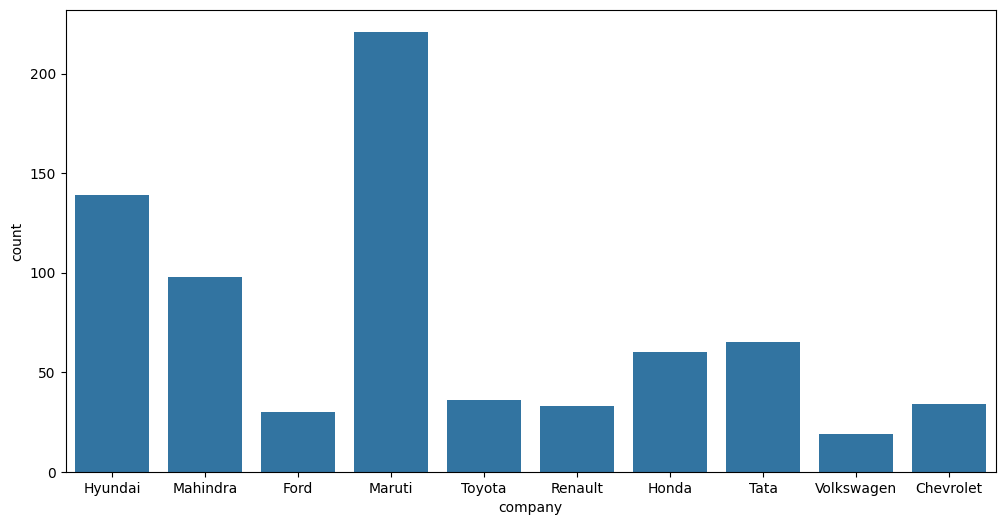

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='company',data=car_top10)

<Axes: xlabel='year', ylabel='Price'>

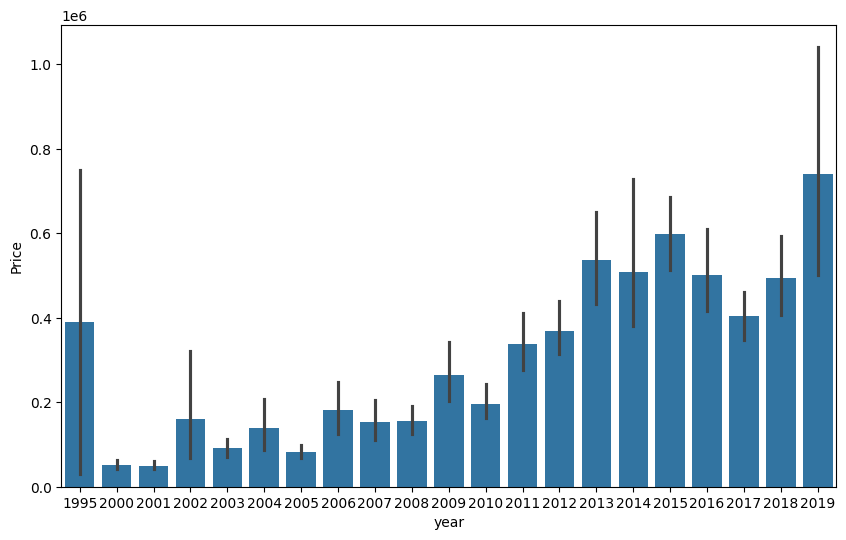

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year',y='Price',data=car)

C:\Users\91741\AppData\Local\Temp\ipykernel_2412\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


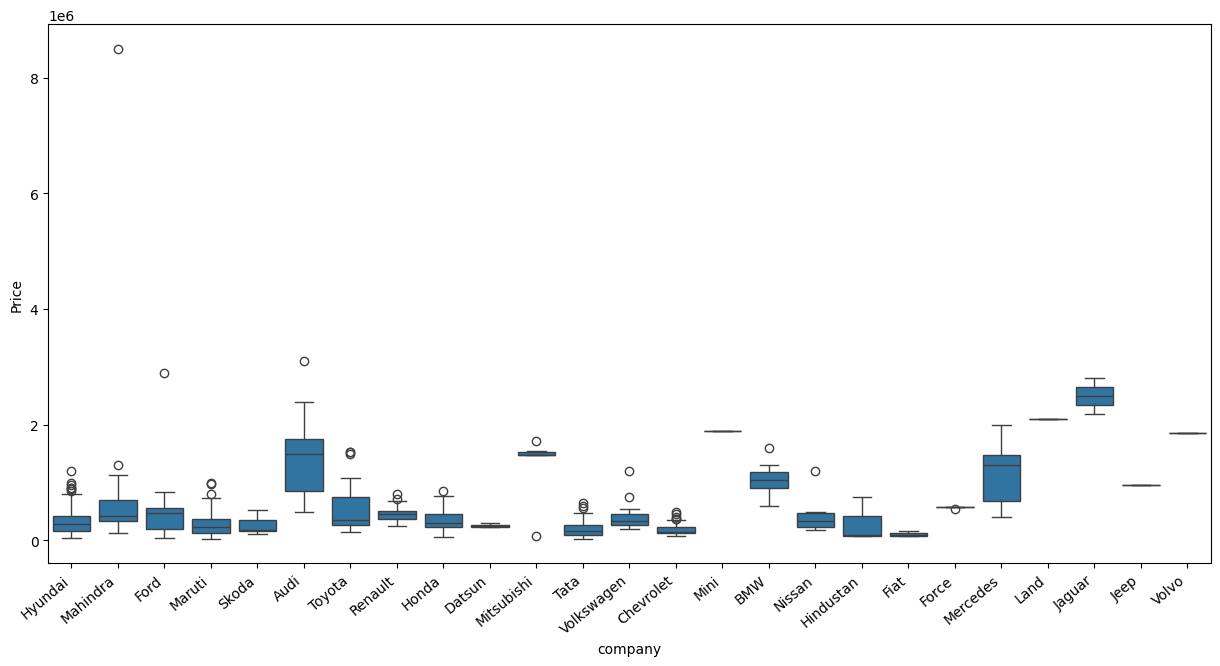

In [30]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

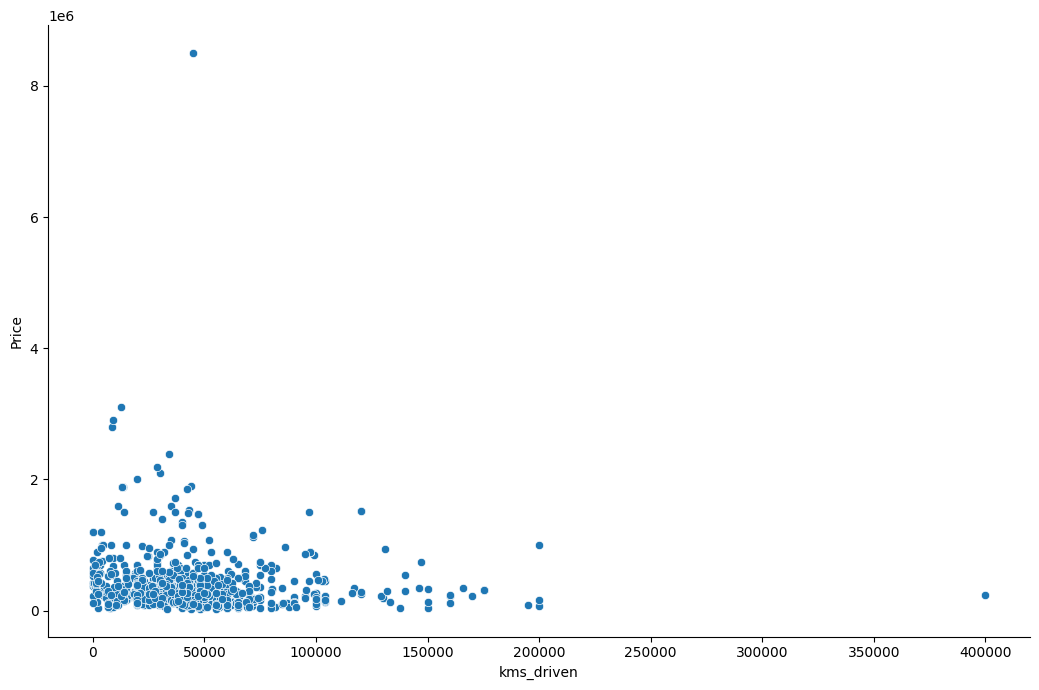

In [31]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

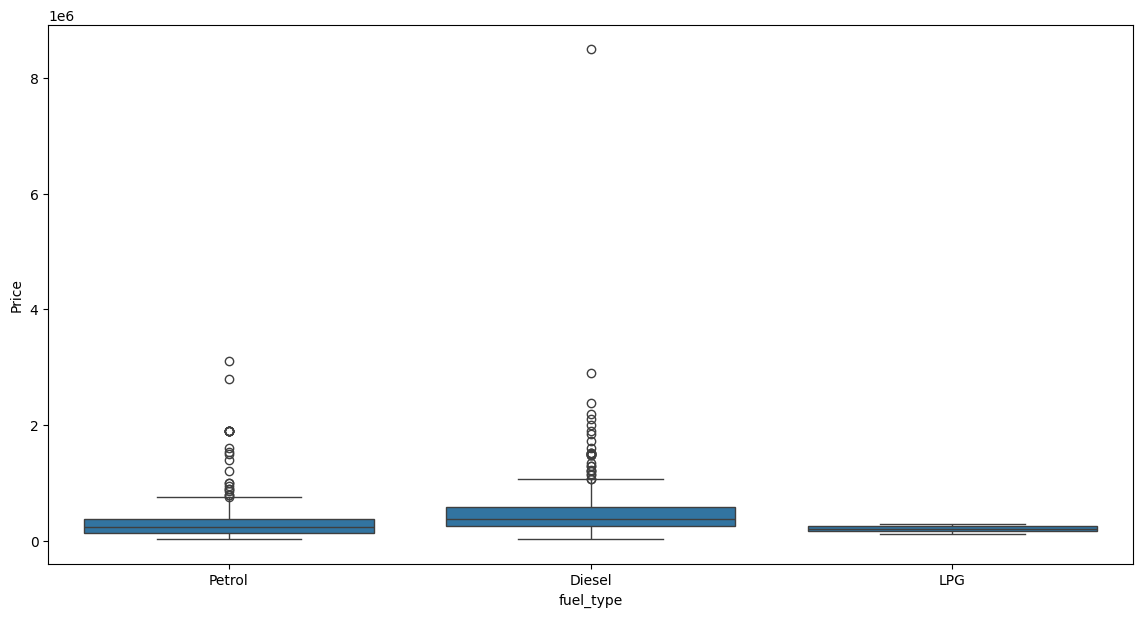

In [32]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

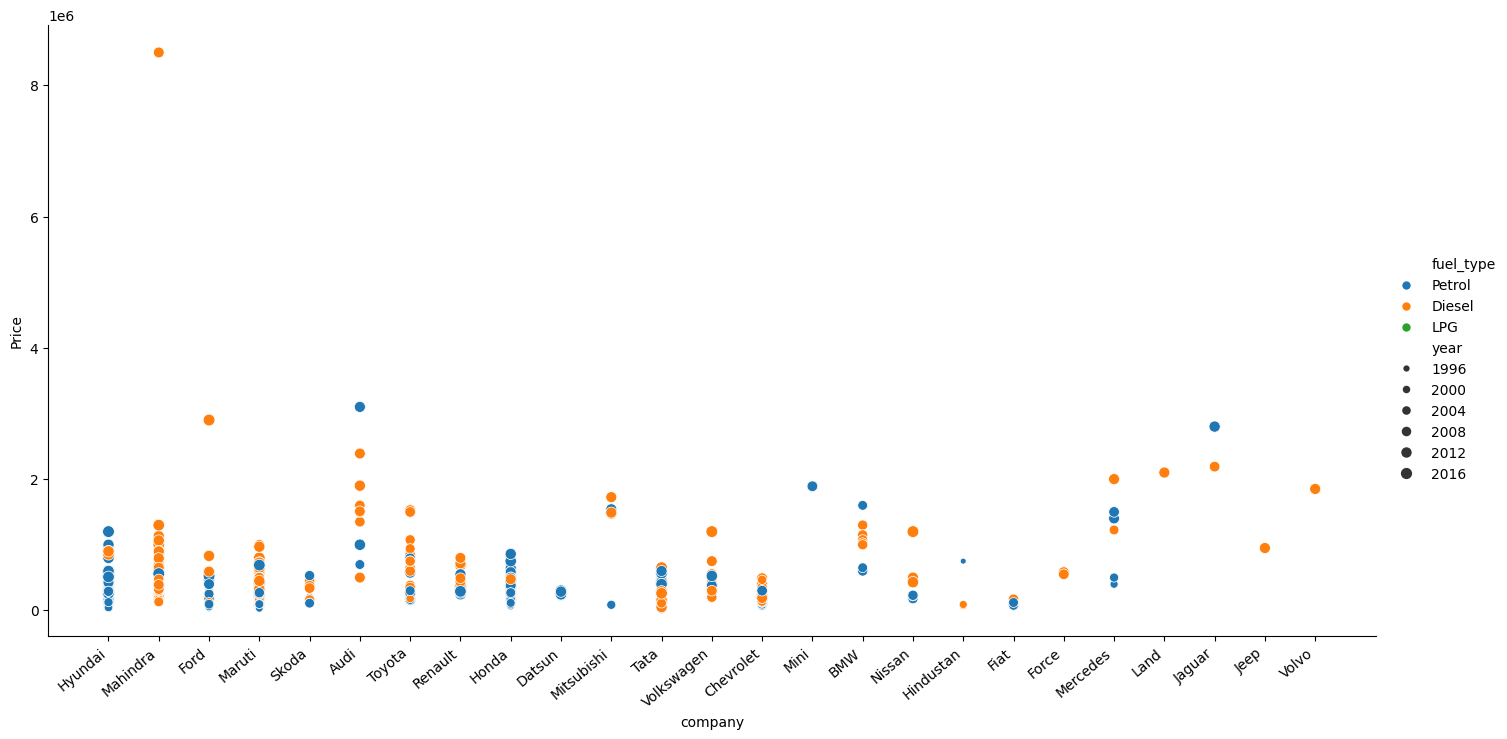

In [33]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

<Axes: xlabel='year', ylabel='Price'>

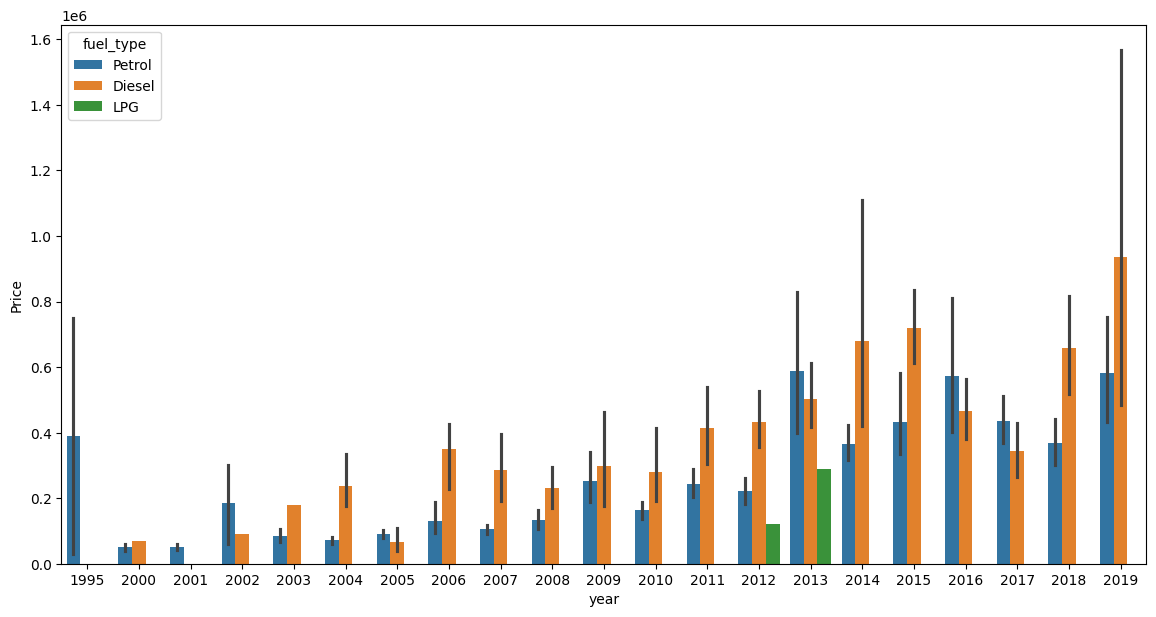

In [34]:
plt.subplots(figsize=(14,7))
sns.barplot(x='year', y='Price',hue='fuel_type',data=car)

In [35]:
columns=['year','Price','kms_driven']

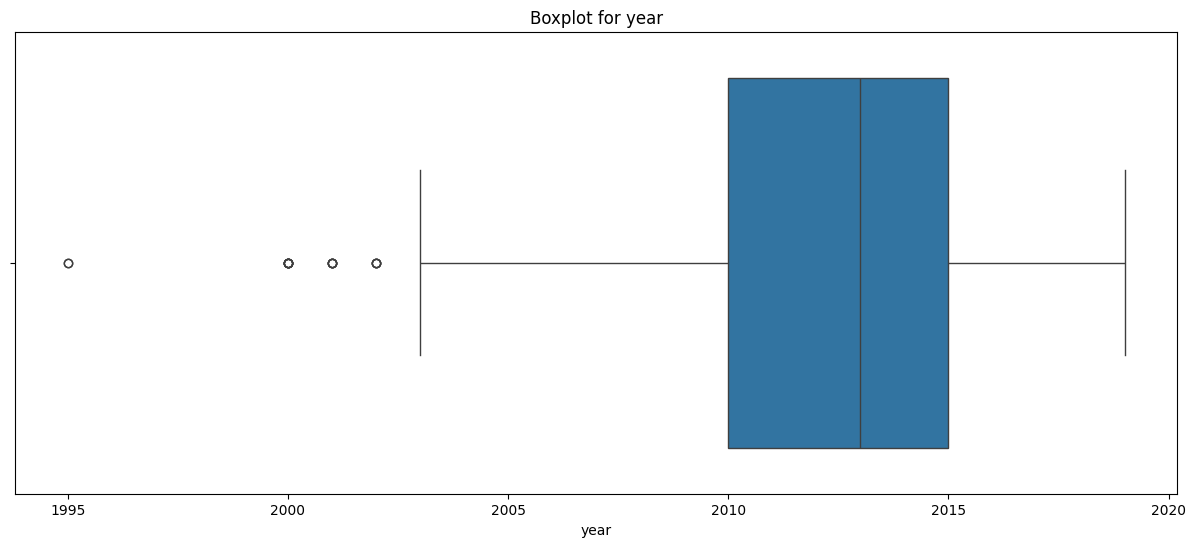

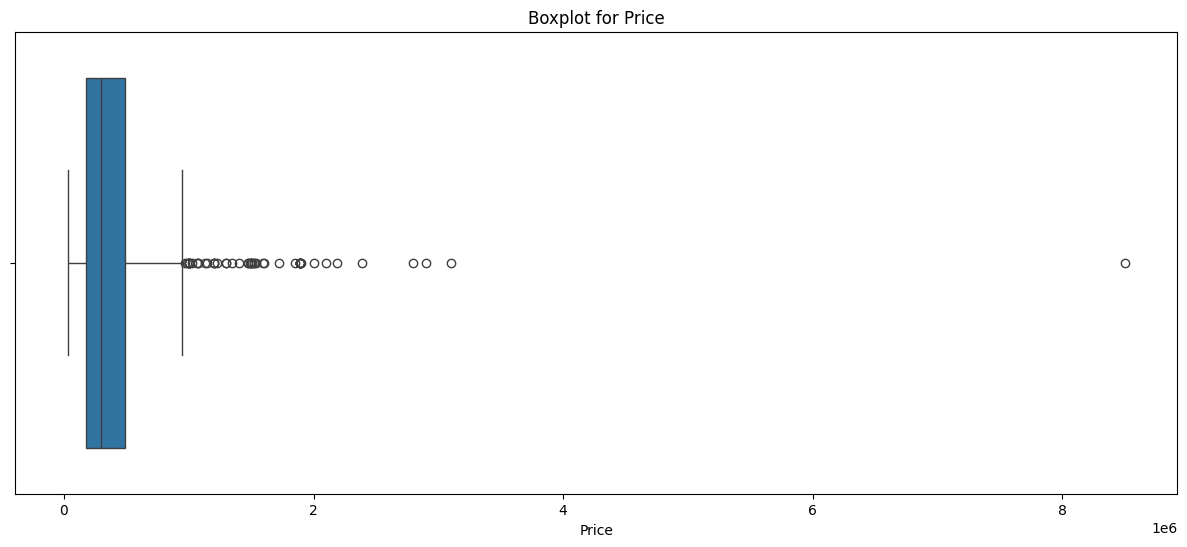

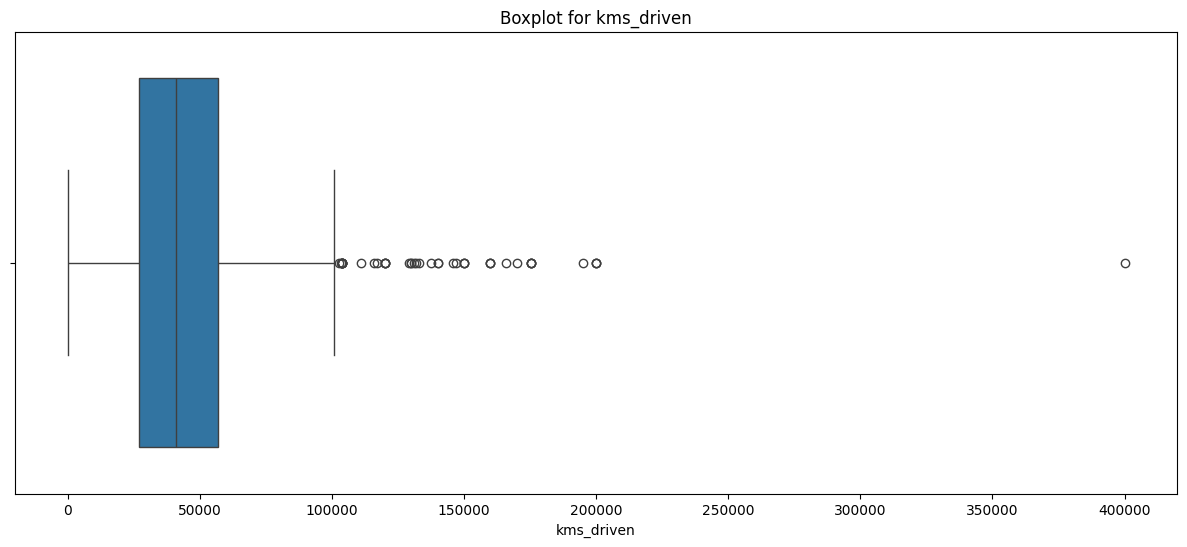

In [36]:
for col in columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=car[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [37]:
for col in columns:
    print(col,':',car[col].skew())

year : -1.003423021587688
Price : 7.521224840597819
kms_driven : 2.6549581996425684


In [38]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


Feature Engineering and Model Building 

In [39]:
car.shape

(816, 6)

In [40]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [41]:
car.to_csv('cleaned_car.csv')

In [42]:
car=car[car['Price']<6000000]

In [43]:
car.shape

(815, 6)

In [44]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [46]:
from sklearn.pipeline import Pipeline

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [60]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [61]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
pipe=make_pipeline(column_trans,LinearRegression()),
make_pipeline(column_trans,Lasso()),        
make_pipeline(column_trans, RandomForestRegressor()),
make_pipeline(column_trans, KNeighborsRegressor()),           
make_pipeline(column_trans, SVR()),
make_pipeline(column_trans, XGBRegressor()),


(Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('onehotencoder',
                                                   OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight

In [63]:
for pipeline in pipe:
    pipeline.fit(X_train, y_train)
    y_pred =pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score : {r2}")


R2 Score : 0.8437211970193643


In [65]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    xgb=XGBRegressor()
    pipe=make_pipeline(column_trans,xgb)
    pipe.fit(X_train,y_train)
    y_pred1=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred1))

In [66]:
np.argmax(scores)

652

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
xgb=XGBRegressor()
pipe=make_pipeline(column_trans,xgb)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9026315447580586

Highest Accuracy with Xgboost Regressor

In [68]:
import pickle

In [69]:
pickle.dump(pipe,open('MyRegressionModel.pkl','wb'))